In [1]:
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.test.mock import FakeMumbai
from qiskit.visualization import dag_drawer

In [2]:
backend = FakeMumbai()

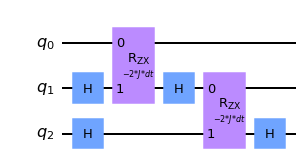

In [3]:
# Latex-like symbols only supported by current versions of my PR 6899 (in template optimization)
JJ = Parameter('$J$') # exchange coupling strength
hh = Parameter('$h$') # transverse magnetic field
dt = Parameter('$dt$') # Trotter step size
TT = Parameter('$T$') # total time

# use non-Latex-like Parameters when going off older commit mods-for-mzm-phase
# JJ = Parameter('J') # exchange coupling strength
# hh = Parameter('h') # transverse magnetic field
# dt = Parameter('dt') # Trotter step size
# TT = Parameter('T') # total time

qc = QuantumCircuit(3)
qc.h(1)
qc.rzx(-2*JJ*dt, 0, 1)
qc.h(1)
qc.h(2)
qc.rzx(-2*JJ*dt, 1, 2)
qc.h(2)
qc.draw(output='mpl')

In [4]:
from qiskit_research.utils.pauli_twirling import add_pauli_twirls
twirled_circs = add_pauli_twirls(qc, backend, 'rzx', 10, verify=True)

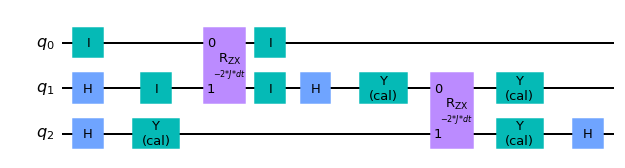

In [5]:
twirled_circs[-1][3].draw(output='mpl')

In [6]:
import qiskit.tools.jupyter
%qiskit_version_table